# Data Preparation

Dataset: <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality">Wine Quality</a><br>
Filename: winequality-red.csv & winequality-white.csv


## Import Libraries

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [87]:
# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [88]:
from scipy.stats import norm
from scipy import stats

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

________

# Part 2 - Data Quality Assessment

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [90]:
df_red = pd.read_csv("./winequality-red.csv", sep=";")
df_white = pd.read_csv("./winequality-white.csv", sep=";")

View the Dataset

In [91]:
# ADDING wine_color to red wines as 0
wine_color = []
for i in range(0,df_red.quality.count()):
    wine_color.append(0)
df_red['wine_color'] = wine_color

# ADDING wine_color to white wines as 1
wine_color = []
for i in range(0,df_white.quality.count()):
    wine_color.append(1)
df_white['wine_color'] = wine_color

Check the Shape

In [92]:
# df.shape

df = pd.concat([df_red,df_white])
df.shape

(6497, 13)

Set the correct index

In [93]:
# df.set_index('Id', inplace=True)

## Ensure Columns / Features have Proper Labels

In [94]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_color'],
      dtype='object')

In [95]:
correct_col_names = []

# REPLACING SPACE WITH _ FOR PROPER LABEL
for col_name in df.columns:
    splitted_name = col_name.split(' ')
    if len(splitted_name) == 1:
        correct_col_names.append(col_name)
    else:
        joined_name = '_'.join(splitted_name)
        correct_col_names.append(joined_name)

# REASSIGN COLUMN HEADERS
df.columns = correct_col_names

## Ensure Correct Format of Values

In [96]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_color                int64
dtype: object

## Remove Duplicates

Check if Index is duplicated

In [97]:
df.duplicated().sum()

1177

Check if there are duplicated rows


In [98]:
df[df.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
11,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,0
27,7.90,0.43,0.21,1.60,0.11,10.00,37.00,1.00,3.17,0.91,9.50,5,0
40,7.30,0.45,0.36,5.90,0.07,12.00,87.00,1.00,3.33,0.83,10.50,5,0
65,7.20,0.72,0.05,4.65,0.09,4.00,11.00,1.00,3.41,0.39,10.90,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.40,0.23,0.35,10.30,0.04,54.00,140.00,1.00,3.23,0.47,9.20,5,1
4850,7.00,0.36,0.35,2.50,0.05,67.00,161.00,0.99,3.05,0.56,11.10,6,1
4851,6.40,0.33,0.44,8.90,0.06,52.00,164.00,0.99,3.10,0.48,9.60,5,1
4856,7.10,0.23,0.39,13.70,0.06,26.00,172.00,1.00,2.90,0.46,9.00,6,1


Remove the duplicates if any

In [99]:
df.drop_duplicates(inplace=True)

## Handle Missing Data

Check for missing data

In [100]:
#Gets the total number of missing data
total = df.isnull().sum().sort_values(ascending=False)


In [101]:
#Get % of Null
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [102]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
fixed_acidity,0,0.00
volatile_acidity,0,0.00
citric_acid,0,0.00
residual_sugar,0,0.00
chlorides,0,0.00
free_sulfur_dioxide,0,0.00
total_sulfur_dioxide,0,0.00
density,0,0.00
pH,0,0.00
sulphates,0,0.00


In [103]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
count,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00
mean,7.22,0.34,0.32,5.05,0.06,30.04,114.11,0.99,3.22,0.53,10.55,5.80,0.74
std,1.32,0.17,0.15,4.50,0.04,17.81,56.77,0.00,0.16,0.15,1.19,0.88,0.44
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.00
25%,6.40,0.23,0.24,1.80,0.04,16.00,74.00,0.99,3.11,0.43,9.50,5.00,0.00
50%,7.00,0.30,0.31,2.70,0.05,28.00,116.00,0.99,3.21,0.51,10.40,6.00,1.00
75%,7.70,0.41,0.40,7.50,0.07,41.00,153.25,1.00,3.33,0.60,11.40,6.00,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,1.00


In [104]:
df.shape

(5320, 13)

_______

# Part 3 - Exploratory Data Analysis

Get the statistics for numerical data

In [105]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5,0


In [106]:
#1 Age
df['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

______

<AxesSubplot:>

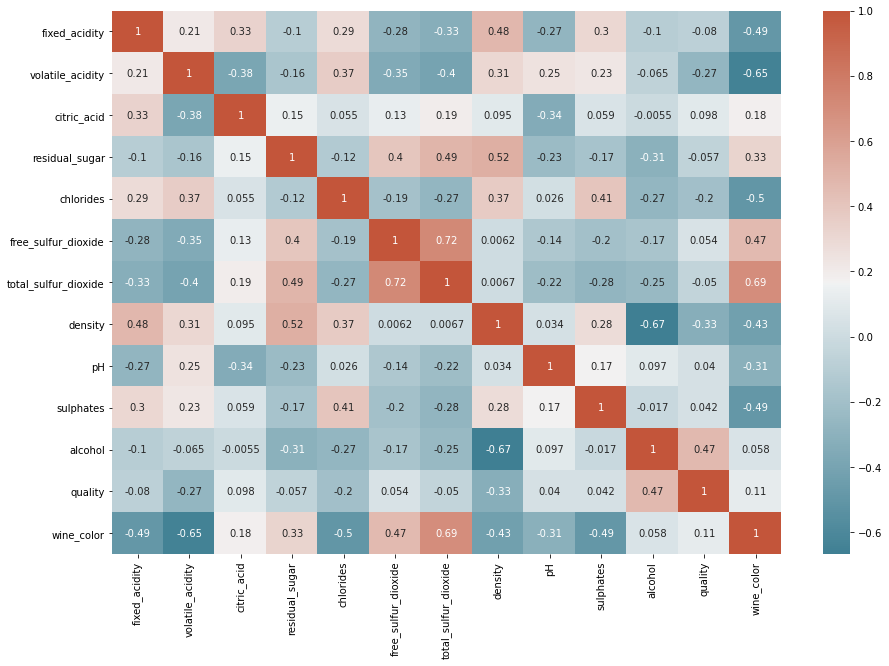

In [107]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

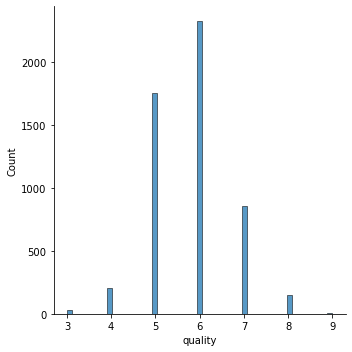

In [108]:
sns.displot(df['quality'])

<AxesSubplot:xlabel='quality'>

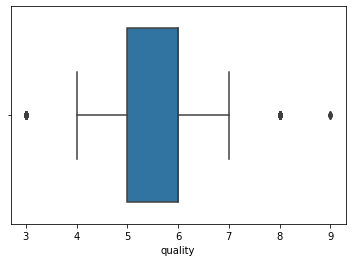

In [109]:
sns.boxplot(df['quality'])

In [110]:
# fig = plt.figure(figsize= [20, 10])
# cols = df.columns
# cnt = 1
# for col in cols:
#     plt.subplot(4,3,cnt)
#     sns.distplot(df[col],hist_kws=dict(edgecolor='k', linewidth=1, color='blue'), color='red')
#     cnt+=1
# plt.tight_layout()
# plt.show()

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

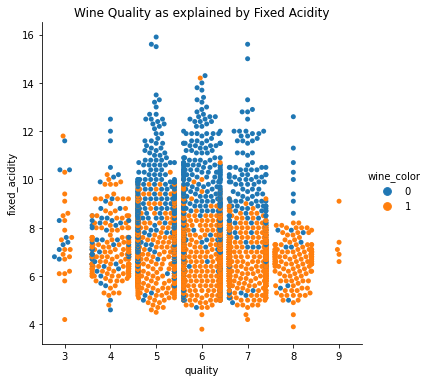

In [112]:
# get some idea of the data
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed_acidity", hue="wine_color", kind="swarm", data=df)
plt.title("Wine Quality as explained by Fixed Acidity")

In [113]:
def isGoodQuality(quality):
    return 1 if quality >= 7 else 0


# Create Classification version of target variable
# df['good_quality'] = [1 if x >= 7 else 0 for x in df['quality']]
df['good_quality'] = df['quality'].apply(isGoodQuality)
df.good_quality.value_counts()

# Separate feature variables and target variable
X_quality = df.drop(['quality', 'good_quality'], axis = 1)
y_quality = df['good_quality']


In [114]:
X_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,0
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,1
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,1
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,1
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,1


In [115]:
y_quality.value_counts()

0    4311
1    1009
Name: good_quality, dtype: int64

In [116]:
# Normalize feature variables
X_features = X_quality
X = StandardScaler().fit_transform(X_quality)

In [117]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_quality, test_size=.75, random_state=0)

In [118]:
#decsion tree
dtc_model = DecisionTreeClassifier(random_state=1)
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3236
           1       0.40      0.42      0.41       754

    accuracy                           0.77      3990
   macro avg       0.63      0.64      0.64      3990
weighted avg       0.78      0.77      0.77      3990



In [119]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, dtc_pred))

Confusion matrix:
[[2765  471]
 [ 437  317]]


Text(0.5, 42.0, 'Predicted label')

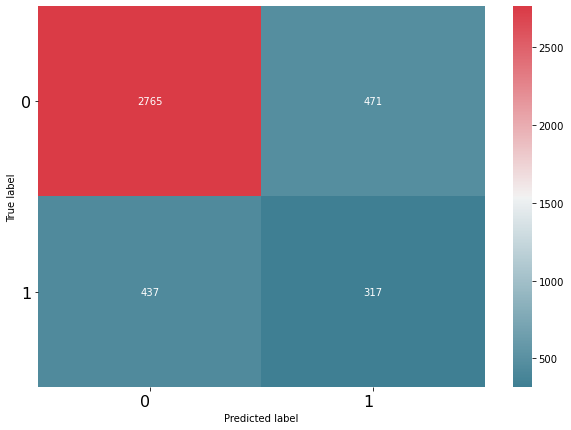

In [120]:
#dito natin makikita yung confusion matrix 

#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, dtc_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [121]:
#random forest
rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3236
           1       0.63      0.30      0.40       754

    accuracy                           0.83      3990
   macro avg       0.74      0.63      0.65      3990
weighted avg       0.81      0.83      0.81      3990



<AxesSubplot:>

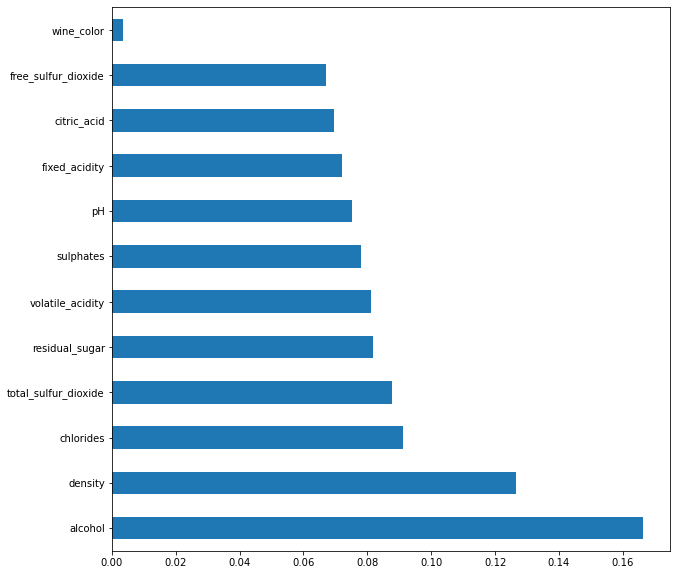

In [122]:
feat_importances = pd.Series(rfc_model.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [123]:
print('Decision Tree')
print(classification_report(y_test, dtc_pred))

print('---------------------------------------------------------------------------------')
print('Random Forest')
print(classification_report(y_test, rfc_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3236
           1       0.40      0.42      0.41       754

    accuracy                           0.77      3990
   macro avg       0.63      0.64      0.64      3990
weighted avg       0.78      0.77      0.77      3990

---------------------------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3236
           1       0.63      0.30      0.40       754

    accuracy                           0.83      3990
   macro avg       0.74      0.63      0.65      3990
weighted avg       0.81      0.83      0.81      3990



_______

# Combine all the prepared dataframes

In [ ]:
# df_list = [df_num_scaled, df_cat, df_target]

# df_final = pd.concat(df_list, axis = 1)

In [ ]:
# df_final.head()

In [ ]:
# df_final.columns

In [ ]:
# df_final.shape

## Save final DataFrame as a csv file

In [ ]:
# df_final.to_csv('./Output/c2_titanic_Output1.csv')

### Check if it loads correctly

In [ ]:
# df_check = pd.read_csv('./Output/c2_titanic_Output1.csv', index_col='PassengerId')

In [ ]:
# df_check.head()